In [82]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def round_to_hour(t):
    sp = list(map(lambda x : int(x), t.split(':')))
    if sp[2] >= 30:
        sp[1] += 1
    if sp[1] >= 30:
        sp[0] += 1
    return sp[0]

In [8]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [17]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [18]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [32]:
df['hour'] = df.Time.apply(round_to_hour)

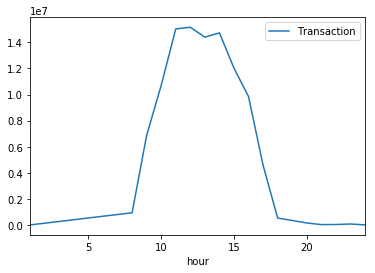

In [47]:
%matplotlib inline
df.groupby('hour').sum().plot()

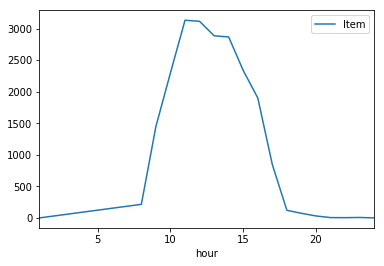

In [51]:
%matplotlib inline
df.groupby('hour').count()[['Item']].plot()

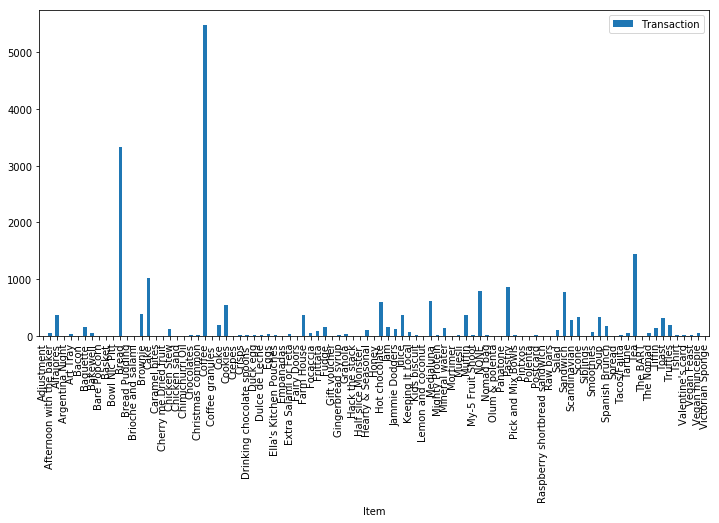

In [67]:
%matplotlib inline
df.groupby('Item').count()[['Transaction']].plot.bar(figsize=(12, 6))

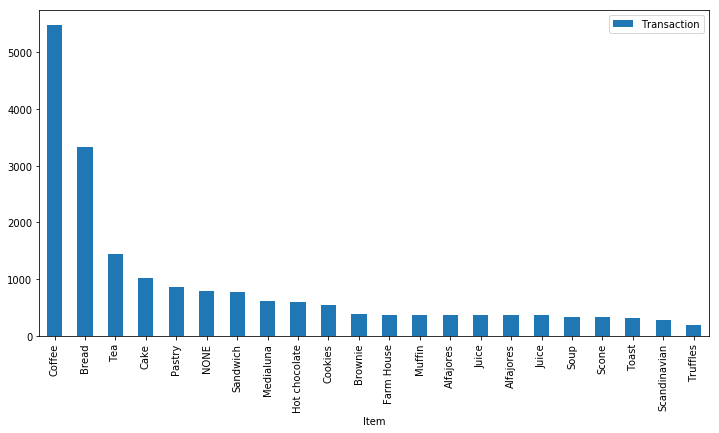

In [76]:
(df.groupby('Item').count()[['Transaction']]
.sort_values('Transaction', ascending=False)
.nlargest(20, 'Transaction')
.plot.bar(figsize=(12, 6)))

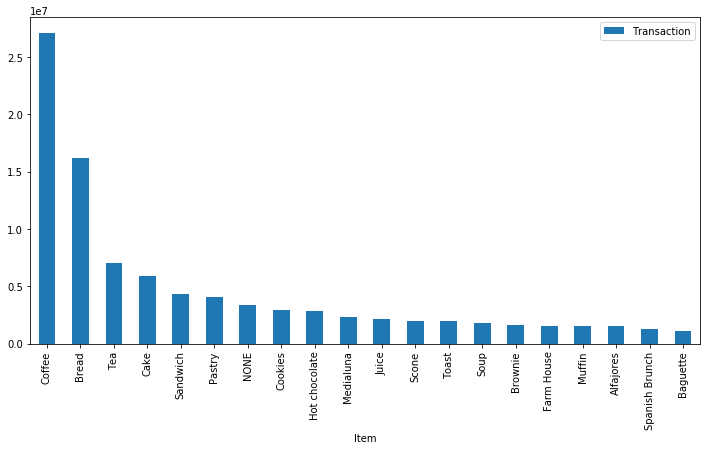

In [77]:
(df.groupby('Item').sum()[['Transaction']]
.sort_values('Transaction', ascending=False)
.nlargest(20, 'Transaction')
.plot.bar(figsize=(12, 6)))

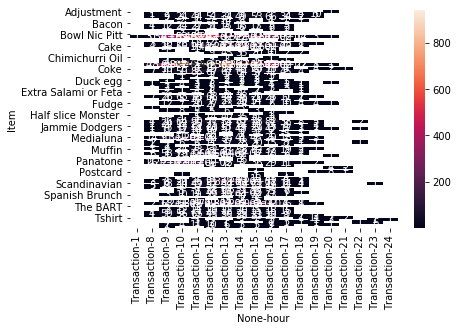

In [91]:
gdf = (df.groupby(['Item', 'hour']).count()[['Transaction']]
.sort_values('Transaction', ascending=False)
)
sns.heatmap(gdf.unstack(), annot=True)

In [205]:
gdf.unstack().fillna(0)

Transaction                                    \
hour                                   1     8      9      10     11     12   
Item                                                                          
Adjustment                            0.0   0.0    0.0    0.0    0.0    0.0   
Afternoon with the baker              0.0   1.0    2.0    2.0    5.0    2.0   
Alfajores                             0.0   1.0    9.0   24.0   44.0   51.0   
Argentina Night                       0.0   0.0    2.0    0.0    2.0    0.0   
Art Tray                              0.0   0.0    0.0    2.0    1.0    7.0   
Bacon                                 0.0   0.0    0.0    0.0    0.0    0.0   
Baguette                              0.0   4.0   12.0   24.0   27.0   31.0   
Bakewell                              0.0   1.0    1.0    6.0    8.0    4.0   
Bare Popcorn                          0.0   0.0    0.0    0.0    0.0    0.0   
Basket                                0.0   0.0    0.0    2.0    4.0    0.0   
Bowl Nic Pitt                         0.0   0.0    0.0    0.0    0.0    0.0   
Bread                                 1.0  31.0  351.0  408.0  540.0  515.0   
Bread Pudding                         0.0   0.0    0.0    0.0    0.0    0.0   
Brioche and salami                    0.0   0.0    0.0    0.0    1.0    2.0   
Brownie                               0.0   3.0   10.0   26.0   54.0   52.0   
Cake                                  0.0   4.0   26.0   56.0   99.0  135.0   
Caramel bites                         0.0   0.0    0.0    0.0    1.0    0.0   
Cherry me Dried fruit                 0.0   0.0    1.0    0.0    1.0    0.0   
Chicken Stew                          0.0   0.0    0.0    0.0    0.0    9.0   
Chicken sand                          0.0   0.0    0.0    0.0    0.0    0.0   
Chimichurri Oil                       0.0   0.0    0.0    0.0    0.0    0.0   
Chocolates                            0.0   0.0    1.0    1.0    0.0    2.0   
Christmas common                      0.0   0.0    4.0    0.0    1.0    3.0   
Coffee                                0.0  78.0  414.0  680.0  940.0  839.0   
Coffee granules                       0.0   0.0    0.0    0.0    3.0    1.0   
Coke                                  0.0   0.0   10.0    7.0    6.0   19.0   
Cookies                               0.0   7.0   20.0   59.0   85.0   67.0   
Crepes                                0.0   0.0    0.0    0.0    0.0    1.0   
Crisps                                0.0   0.0    0.0    1.0    1.0    3.0   
Drinking chocolate spoons             0.0   0.0    0.0    1.0    0.0    0.0   
...                                   ...   ...    ...    ...    ...    ...   
Panatone                              0.0   1.0    0.0    0.0    0.0    1.0   
Pastry                                0.0  26.0  122.0  205.0  186.0  111.0   
Pick and Mix Bowls                    0.0   0.0    0.0    0.0    0.0    4.0   
Pintxos                               0.0   0.0    0.0    0.0    0.0    0.0   
Polenta                               0.0   0.0    0.0    0.0    0.0    0.0   
Postcard                              0.0   0.0    0.0    0.0    0.0    0.0   
Raspberry shortbread sandwich         0.0   0.0    0.0    1.0    0.0    0.0   
Raw bars                              0.0   0.0    0.0    0.0    0.0    0.0   
Salad                                 0.0   0.0    1.0    0.0    2.0    9.0   
Sandwich                              0.0   3.0    8.0   20.0   25.0   91.0   
Scandinavian                          0.0   0.0   18.0   34.0   49.0   52.0   
Scone                                 0.0   5.0    9.0   30.0   37.0   57.0   
Siblings                              0.0   2.0    0.0    0.0    0.0    0.0   
Smoothies                             0.0   0.0    0.0    5.0    9.0   18.0   
Soup                                  0.0   0.0    0.0    1.0    4.0   46.0   
Spanish Brunch                        0.0   0.0    3.0   10.0   19.0   27.0   
Spread                                0.0   0.0    0.0    0.0    0.0    0.0   
T

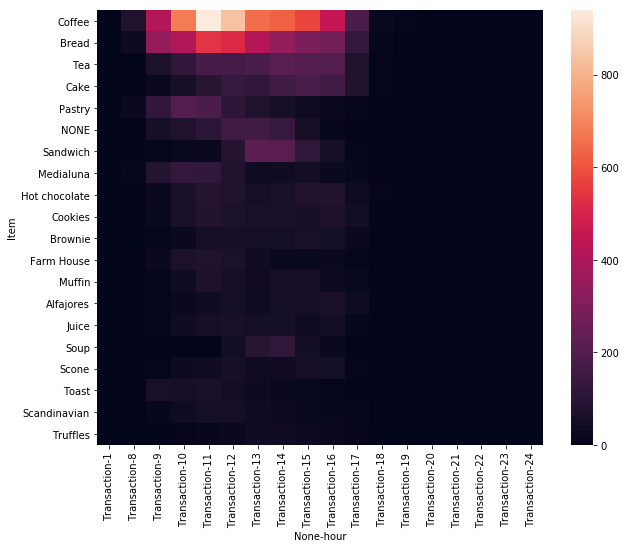

In [207]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(gdf.unstack().fillna(0).loc[list(gdf.unstack().sum(axis=1).sort_values(ascending=False)[:20].keys())]
, annot=False, ax = ax)